In [1]:
import jax
jax.config.update('jax_platform_name', 'cpu')

%cd ..

/home/tianshu/dart


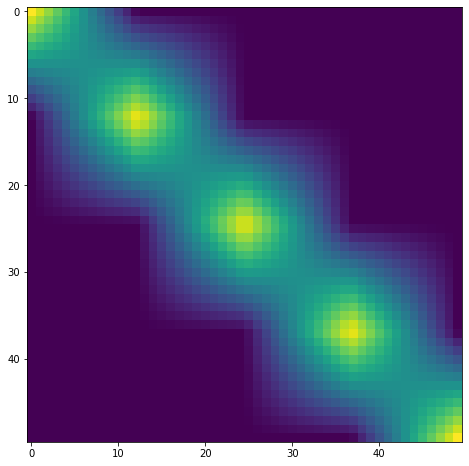

In [4]:
from jax import numpy as jnp
from jax import jit, vmap
from functools import partial
from matplotlib import pyplot as plt
from dart import interpolate

n = 50
grid = jnp.stack([jnp.eye(5).reshape(5, 5, 1) for _ in range(3)])
_x, _y = jnp.meshgrid(jnp.linspace(0, 4, n), jnp.linspace(0, 4, n))
_z = jnp.zeros_like(_y) + 4.5
x = jnp.stack([_z.reshape(-1), _x.reshape(-1), _y.reshape(-1)]).T

res = jit(vmap(partial(interpolate, grid=grid)))(x)
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.imshow(res[:, 0].reshape(n, n))